In [1]:
dataset_names = ["BAShapes", "infection", "Cora", "Citeseer", "Pubmed"]
config_lists = ["2L1H", "2L2H", "2L4H", "2L8H", "3L1H", "3L2H", "3L4H", "3L8H"]

In [2]:
experiment_result_folder = "/workspace/Experimental_Results/"
experiment_artifact_folder = "/workspace/Experimental_Artifacts/"

In [3]:
import torch

## Results for main experiment

### BAShapes

In [4]:
"""
Print the results in a table. Each result represents the experimental results for a single dataset and a single configuration.
(Measure: 'ΔPC', 'ΔNE', 'ROC_AUC')
The table looks like this (example for the cora dataset):
|  Dataset |  Measure  |  Metric  | attattribute | attattribute_sim | avgatt | random |
|----------|-----------|----------|--------------|------------------|--------|--------|
|   Cora   |    ΔPC    | pearsonr |{result['attattribute']['ΔPC']['pearsonr']:.4f}|{result['attattribute_sim']['ΔPC']['pearsonr']:.4f}|{result['avgatt']['ΔPC']['pearsonr']:.4f}|{result['random']['ΔPC']['pearsonr']:.4f}|
|   Cora   |    ΔPC    |spearmanr |{result['attattribute']['ΔPC']['spearmanr']:.4f}|{result['attattribute_sim']['ΔPC']['spearmanr']:.4f}|{result['avgatt']['ΔPC']['spearmanr']:.4f}|{result['random']['ΔPC']['spearmanr']:.4f}|
|   Cora   |    ΔPC    |kendalltau|{result['attattribute']['ΔPC']['kendalltau']:.4f}|{result['attattribute_sim']['ΔPC']['kendalltau']:.4f}|{result['avgatt']['ΔPC']['kendalltau']:.4f}|{result['random']['ΔPC']['kendalltau']:.4f}|
|   Cora   |    ΔNE    | pearsonr |{result['attattribute']['ΔNE']['pearsonr']:.4f}|{result['attattribute_sim']['ΔNE']['pearsonr']:.4f}|{result['avgatt']['ΔNE']['pearsonr']:.4f}|{result['random']['ΔNE']['pearsonr']:.4f}|
|   Cora   |    ΔNE    |spearmanr |{result['attattribute']['ΔNE']['spearmanr']:.4f}|{result['attattribute_sim']['ΔNE']['spearmanr']:.4f}|{result['avgatt']['ΔNE']['spearmanr']:.4f}|{result['random']['ΔNE']['spearmanr']:.4f}|
|   Cora   |    ΔNE    |kendalltau|{result['attattribute']['ΔNE']['kendalltau']:.4f}|{result['attattribute_sim']['ΔNE']['kendalltau']:.4f}|{result['avgatt']['ΔNE']['kendalltau']:.4f}|{result['random']['ΔNE']['kendalltau']:.4f}|
|   Cora   |Pred.change| ROC_AUC  |{result['attattribute']['ROC_AUC']:.4f}|{result['attattribute_sim']['ROC_AUC']:.4f}|{result['avgatt']['ROC_AUC']:.4f}|{result['random']['ROC_AUC']:.4f}|
"""
dataset = dataset_names[0]
for config in config_lists:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")
            

|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   BAShapes   |    ΔPC    | pearsonr   | 0.0933 | 0.1047 | 0.0416 | -0.0078|
|   BAShapes   |    ΔPC    | kendalltau | 0.0642 | 0.0748 | 0.0391 | -0.0012|
|   BAShapes   |    ΔPC    | spearmanr  | 0.0829 | 0.1101 | 0.0603 | -0.0016|
|   BAShapes   |    ΔNE    | pearsonr   | 0.1191 | 0.1215 | 0.0543 | -0.0064|
|   BAShapes   |    ΔNE    | kendalltau | 0.0799 | 0.0919 | 0.0468 | -0.0039|
|   BAShapes   |    ΔNE    | spearmanr  | 0.1067 | 0.1295 | 0.0682 | -0.0055|
|   BAShapes   |Pred.change| ROC_AUC    | 0.8846 | 0.8632 | 0.7092 | 0.5055|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   BAShapes   |    ΔPC    | pearsonr   | 0.0887 | 0.1249 | 0.0497 | -0.0048|
|   BAShapes   |    ΔPC    | kendalltau | -0.0155 | -0.0020 | 0.0143 | -0.0014|
|   BAShapes   |    ΔPC    | spearmanr  | -0.0227 | 0.0011 | 0.0200 | -0.0019|
|   BAShapes   |    ΔNE    |

### Infection

In [5]:
dataset = dataset_names[1]
for config in config_lists:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   infection   |    ΔPC    | pearsonr   | 0.8979 | 0.7516 | 0.2474 | 0.0002|
|   infection   |    ΔPC    | kendalltau | 0.0880 | 0.3374 | 0.2953 | 0.0061|
|   infection   |    ΔPC    | spearmanr  | 0.0657 | 0.4250 | 0.3740 | 0.0086|
|   infection   |    ΔNE    | pearsonr   | 0.9728 | 0.7943 | 0.2615 | 0.0018|
|   infection   |    ΔNE    | kendalltau | 0.0836 | 0.3308 | 0.2885 | 0.0073|
|   infection   |    ΔNE    | spearmanr  | 0.0798 | 0.4391 | 0.3721 | 0.0104|
|   infection   |Pred.change| ROC_AUC    | 0.9912 | 0.9818 | 0.7923 | 0.5054|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   infection   |    ΔPC    | pearsonr   | 0.6807 | 0.6638 | 0.2399 | 0.0122|
|   infection   |    ΔPC    | kendalltau | 0.6872 | 0.5032 | -0.0302 | 0.0035|
|   infection   |    ΔPC    | spearmanr  | 0.7805 | 0.6053 | -0.0315 | 0.0049|
|   infection   |    ΔNE    

### Cora

In [6]:
dataset = dataset_names[2]
for config in config_lists:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Cora   |    ΔPC    | pearsonr   | 0.8771 | 0.7979 | 0.1822 | -0.0036|
|   Cora   |    ΔPC    | kendalltau | 0.7432 | 0.7315 | -0.1606 | 0.0130|
|   Cora   |    ΔPC    | spearmanr  | 0.7892 | 0.7844 | -0.2258 | 0.0172|
|   Cora   |    ΔNE    | pearsonr   | 0.7600 | 0.7016 | 0.1608 | -0.0042|
|   Cora   |    ΔNE    | kendalltau | 0.7936 | 0.7832 | -0.1825 | 0.0096|
|   Cora   |    ΔNE    | spearmanr  | 0.8438 | 0.8412 | -0.2545 | 0.0127|
|   Cora   |Pred.change| ROC_AUC    | 0.9628 | 0.9710 | 0.7292 | 0.4915|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Cora   |    ΔPC    | pearsonr   | 0.8490 | 0.7738 | 0.1767 | 0.0174|
|   Cora   |    ΔPC    | kendalltau | 0.7448 | 0.7357 | -0.1699 | 0.0055|
|   Cora   |    ΔPC    | spearmanr  | 0.7896 | 0.7867 | -0.2396 | 0.0073|
|   Cora   |    ΔNE    | pearsonr   | 0.7362 | 0.6810 | 0.1560 | 0.0222|

### Citeseer

In [7]:
dataset = dataset_names[3]
for config in config_lists:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Citeseer   |    ΔPC    | pearsonr   | 0.8459 | 0.8063 | 0.3091 | -0.0118|
|   Citeseer   |    ΔPC    | kendalltau | 0.8067 | 0.7724 | -0.0060 | -0.0274|
|   Citeseer   |    ΔPC    | spearmanr  | 0.8706 | 0.8593 | -0.0140 | -0.0371|
|   Citeseer   |    ΔNE    | pearsonr   | 0.7555 | 0.7394 | 0.2781 | -0.0111|
|   Citeseer   |    ΔNE    | kendalltau | 0.8949 | 0.8665 | -0.0491 | -0.0215|
|   Citeseer   |    ΔNE    | spearmanr  | 0.9579 | 0.9479 | -0.0767 | -0.0293|
|   Citeseer   |Pred.change| ROC_AUC    | 0.9787 | 0.9757 | 0.9175 | 0.4418|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Citeseer   |    ΔPC    | pearsonr   | 0.8343 | 0.7928 | 0.3022 | 0.0030|
|   Citeseer   |    ΔPC    | kendalltau | 0.8013 | 0.7682 | -0.0157 | 0.0169|
|   Citeseer   |    ΔPC    | spearmanr  | 0.8609 | 0.8479 | -0.0283 | 0.0228|
|   Citeseer   |    ΔNE    |

### Pubmed

In [8]:
dataset = dataset_names[4]
for config in config_lists:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Pubmed   |    ΔPC    | pearsonr   | 0.8683 | 0.7541 | 0.1609 | -0.0004|
|   Pubmed   |    ΔPC    | kendalltau | 0.7531 | 0.7204 | -0.0876 | 0.0003|
|   Pubmed   |    ΔPC    | spearmanr  | 0.7829 | 0.7811 | -0.1164 | 0.0004|
|   Pubmed   |    ΔNE    | pearsonr   | 0.8196 | 0.7209 | 0.1468 | -0.0009|
|   Pubmed   |    ΔNE    | kendalltau | 0.8133 | 0.7854 | -0.0930 | 0.0008|
|   Pubmed   |    ΔNE    | spearmanr  | 0.8522 | 0.8529 | -0.1238 | 0.0010|
|   Pubmed   |Pred.change| ROC_AUC    | 0.9982 | 0.9972 | 0.9620 | 0.5242|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Pubmed   |    ΔPC    | pearsonr   | 0.8530 | 0.7392 | 0.1592 | -0.0011|
|   Pubmed   |    ΔPC    | kendalltau | 0.7546 | 0.7184 | -0.0962 | -0.0005|
|   Pubmed   |    ΔPC    | spearmanr  | 0.7847 | 0.7777 | -0.1275 | -0.0006|
|   Pubmed   |    ΔNE    | pearsonr   | 0.8297 | 

### Arxiv

In [9]:
import torch

dataset = 'Arxiv'
config = '2L1H'

results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
for measure in ["ΔPC", "ΔNE"]:
    if measure == "ΔPC":
        for metric in ["pearsonr", "kendalltau", "spearmanr"]:
            print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
    else:
        for metric in ["pearsonr", "kendalltau", "spearmanr"]:
            print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
print("\n")

|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Arxiv   |    ΔPC    | pearsonr   | 0.8295 | 0.5710 | 0.1309 | 0.0002|
|   Arxiv   |    ΔPC    | kendalltau | 0.7109 | 0.6906 | -0.0163 | -0.0055|
|   Arxiv   |    ΔPC    | spearmanr  | 0.7583 | 0.7489 | -0.0409 | -0.0074|
|   Arxiv   |    ΔNE    | pearsonr   | 0.8680 | 0.6001 | 0.1373 | 0.0015|
|   Arxiv   |    ΔNE    | kendalltau | 0.9131 | 0.8888 | -0.0516 | -0.0026|
|   Arxiv   |    ΔNE    | spearmanr  | 0.9513 | 0.9458 | -0.0995 | -0.0035|
|   Arxiv   |Pred.change| ROC_AUC    | 0.9987 | 0.9932 | 0.9098 | 0.4611|




In [10]:
import torch

dataset = 'Arxiv'
config = '3L1H'

results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset}_{config}.pt")
print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
for measure in ["ΔPC", "ΔNE"]:
    if measure == "ΔPC":
        for metric in ["pearsonr", "kendalltau", "spearmanr"]:
            print(f"|   {dataset}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
    else:
        for metric in ["pearsonr", "kendalltau", "spearmanr"]:
            print(f"|   {dataset}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
print(f"|   {dataset}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
print("\n")

|     3L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Arxiv   |    ΔPC    | pearsonr   | 0.7568 | 0.1323 | 0.0436 | 0.0013|
|   Arxiv   |    ΔPC    | kendalltau | 0.1550 | 0.1155 | -0.0188 | -0.0009|
|   Arxiv   |    ΔPC    | spearmanr  | 0.1942 | 0.1367 | -0.0265 | -0.0012|
|   Arxiv   |    ΔNE    | pearsonr   | 0.8282 | 0.1449 | 0.0478 | 0.0018|
|   Arxiv   |    ΔNE    | kendalltau | 0.1843 | 0.1357 | -0.0037 | -0.0011|
|   Arxiv   |    ΔNE    | spearmanr  | 0.2301 | 0.1685 | -0.0055 | -0.0016|
|   Arxiv   |Pred.change| ROC_AUC    | 0.9985 | 0.9674 | 0.8331 | 0.5334|




## Results for GAtt_sim baseline

In [17]:
"""
Compute the performance of attattribute, attattribute_sim, avgatt, random 
by averaging the results over different measures and metrics.
Compare for different datasets.
"""
import numpy as np

# Cora
gatt_result_cora_2layer_raw = np.array([0.8771, 0.7432, 0.7892, 0.7600, 0.7936, 0.8438, 0.9628])
gatt_sim_result_cora_2layer_raw = np.array([0.7979, 0.7315, 0.7844, 0.7016, 0.7832, 0.8412, 0.9710])
avgatt_result_cora_2layer_raw = np.array([0.1822, -0.1606, -0.2258, 0.1608, -0.1825, -0.2545, 0.7292])
random_result_cora_2layer_raw = np.array([-0.0036, 0.0130, 0.0172, -0.0042, 0.0096, 0.0127, 0.4915])

gatt_result_cora_3layer_raw = np.array([0.8465, 0.6508, 0.7219, 0.7740, 0.6964, 0.7821, 0.9827])
gatt_sim_result_cora_3layer_raw = np.array([0.6170, 0.5712, 0.6852, 0.5854, 0.6124, 0.7333, 0.9766])
avgatt_result_cora_3layer_raw = np.array([0.0951, -0.0619, -0.0851, 0.0864, -0.0673, -0.0924, 0.6881])
random_result_cora_3layer_raw = np.array([0.0000, 0.0018, 0.0025, 0.0004, 0.0028, 0.0039, 0.4717])

# Citeseer
gatt_result_citeseer_2layer_raw = np.array([0.8459, 0.8067, 0.8706, 0.7555, 0.8949, 0.9579, 0.9787])
gatt_sim_result_citeseer_2layer_raw = np.array([0.8063, 0.7724, 0.8593, 0.7394, 0.8665, 0.9479, 0.9757])
avgatt_result_citeseer_2layer_raw = np.array([0.3091, -0.0060, -0.0140, -0.2781, 0.0491, 0.0767, 0.9175])
random_result_citeseer_2layer_raw = np.array([-0.0118, -0.0274, -0.0371, -0.0111, -0.0215, -0.0293, 0.4418])

gatt_result_citeseer_3layer_raw = np.array([0.8778, 0.7927, 0.8486, 0.8419, 0.8728, 0.9250, 0.9931])
gatt_sim_result_citeseer_3layer_raw = np.array([0.6636, 0.7086, 0.8204, 0.6735, 0.7776, 0.8932, 0.9885])
avgatt_result_citeseer_3layer_raw = np.array([0.2130, -0.0214, -0.0299, -0.2043, 0.0248, 0.0350, 0.9235])
random_result_citeseer_3layer_raw = np.array([-0.0036, 0.0074, 0.0103, -0.0019, 0.0061, 0.0085, 0.5205])

# Pubmed
gatt_result_pubmed_2layer_raw = np.array([0.8683, 0.7531, 0.7829, 0.8196, 0.8133, 0.8522, 0.9982])
gatt_sim_result_pubmed_2layer_raw = np.array([0.7541, 0.7204, 0.7811, 0.7209, 0.7854, 0.8529, 0.9972])
avgatt_result_pubmed_2layer_raw = np.array([0.1609, -0.0876, -0.1164, -0.1468, 0.0930, 0.1238, 0.9620])
random_result_pubmed_2layer_raw = np.array([-0.0004, 0.0003, 0.0004, -0.0009, 0.0008, 0.0010, 0.5242])

gatt_result_pubmed_3layer_raw = np.array([0.8317, 0.6160, 0.6569, 0.8701, 0.6839, 0.7266, 0.9924])
gatt_sim_result_pubmed_3layer_raw = np.array([0.4106, 0.5641, 0.6308, 0.4532, 0.6265, 0.6984, 0.9472])
avgatt_result_pubmed_3layer_raw = np.array([0.0570, -0.1215, -0.1623, 0.0599, -0.1276, -0.1707, 0.7648])
random_result_pubmed_3layer_raw = np.array([-0.0016, -0.0018, -0.0024, -0.0024, -0.0011, -0.0014, 0.4459])

# Arxiv
gatt_result_arxiv_2layer_raw = np.array([0.8295, 0.7109, 0.7583, 0.8680, 0.9131, 0.9513, 0.9987])
gatt_sim_result_arxiv_2layer_raw = np.array([0.5710, 0.6906, 0.7489, 0.6001, 0.8888, 0.9458, 0.9932])
avgatt_result_arxiv_2layer_raw = np.array([0.1309, -0.0163, -0.0409, 0.1373, -0.0516, -0.0995, 0.9098])
random_result_arxiv_2layer_raw = np.array([0.0002, -0.0055, -0.0074, 0.0015, -0.0026, -0.0035, 0.4611])

gatt_result_arxiv_3layer_raw = np.array([0.7568, 0.1550, 0.1942, 0.8282, 0.1843, 0.2301, 0.9985])
gatt_sim_result_arxiv_3layer_raw = np.array([0.1323, 0.1155, 0.1367, 0.1449, 0.1357, 0.1685, 0.9674])
avgatt_result_arxiv_3layer_raw = np.array([0.0436, -0.0188, -0.0265, 0.0478, -0.0037, -0.0055, 0.8331])
random_result_arxiv_3layer_raw = np.array([0.0013, -0.0009, -0.0012, 0.0018, -0.0011, -0.0016, 0.5334])

In [18]:
cora_result_2layer = [np.mean(gatt_result_cora_2layer_raw), np.mean(gatt_sim_result_cora_2layer_raw), np.mean(avgatt_result_cora_2layer_raw), np.mean(random_result_cora_2layer_raw)]
cora_result_3layer = [np.mean(gatt_result_cora_3layer_raw), np.mean(gatt_sim_result_cora_3layer_raw), np.mean(avgatt_result_cora_3layer_raw), np.mean(random_result_cora_3layer_raw)]
citeseer_result_2layer = [np.mean(gatt_result_citeseer_2layer_raw), np.mean(gatt_sim_result_citeseer_2layer_raw), np.mean(avgatt_result_citeseer_2layer_raw), np.mean(random_result_citeseer_2layer_raw)]
citeseer_result_3layer = [np.mean(gatt_result_citeseer_3layer_raw), np.mean(gatt_sim_result_citeseer_3layer_raw), np.mean(avgatt_result_citeseer_3layer_raw), np.mean(random_result_citeseer_3layer_raw)]
pubmed_result_2layer = [np.mean(gatt_result_pubmed_2layer_raw), np.mean(gatt_sim_result_pubmed_2layer_raw), np.mean(avgatt_result_pubmed_2layer_raw), np.mean(random_result_pubmed_2layer_raw)]
pubmed_result_3layer = [np.mean(gatt_result_pubmed_3layer_raw), np.mean(gatt_sim_result_pubmed_3layer_raw), np.mean(avgatt_result_pubmed_3layer_raw), np.mean(random_result_pubmed_3layer_raw)]
arxiv_result_2layer = [np.mean(gatt_result_arxiv_2layer_raw), np.mean(gatt_sim_result_arxiv_2layer_raw), np.mean(avgatt_result_arxiv_2layer_raw), np.mean(random_result_arxiv_2layer_raw)]
arxiv_result_3layer = [np.mean(gatt_result_arxiv_3layer_raw), np.mean(gatt_sim_result_arxiv_3layer_raw), np.mean(avgatt_result_arxiv_3layer_raw), np.mean(random_result_arxiv_3layer_raw)]


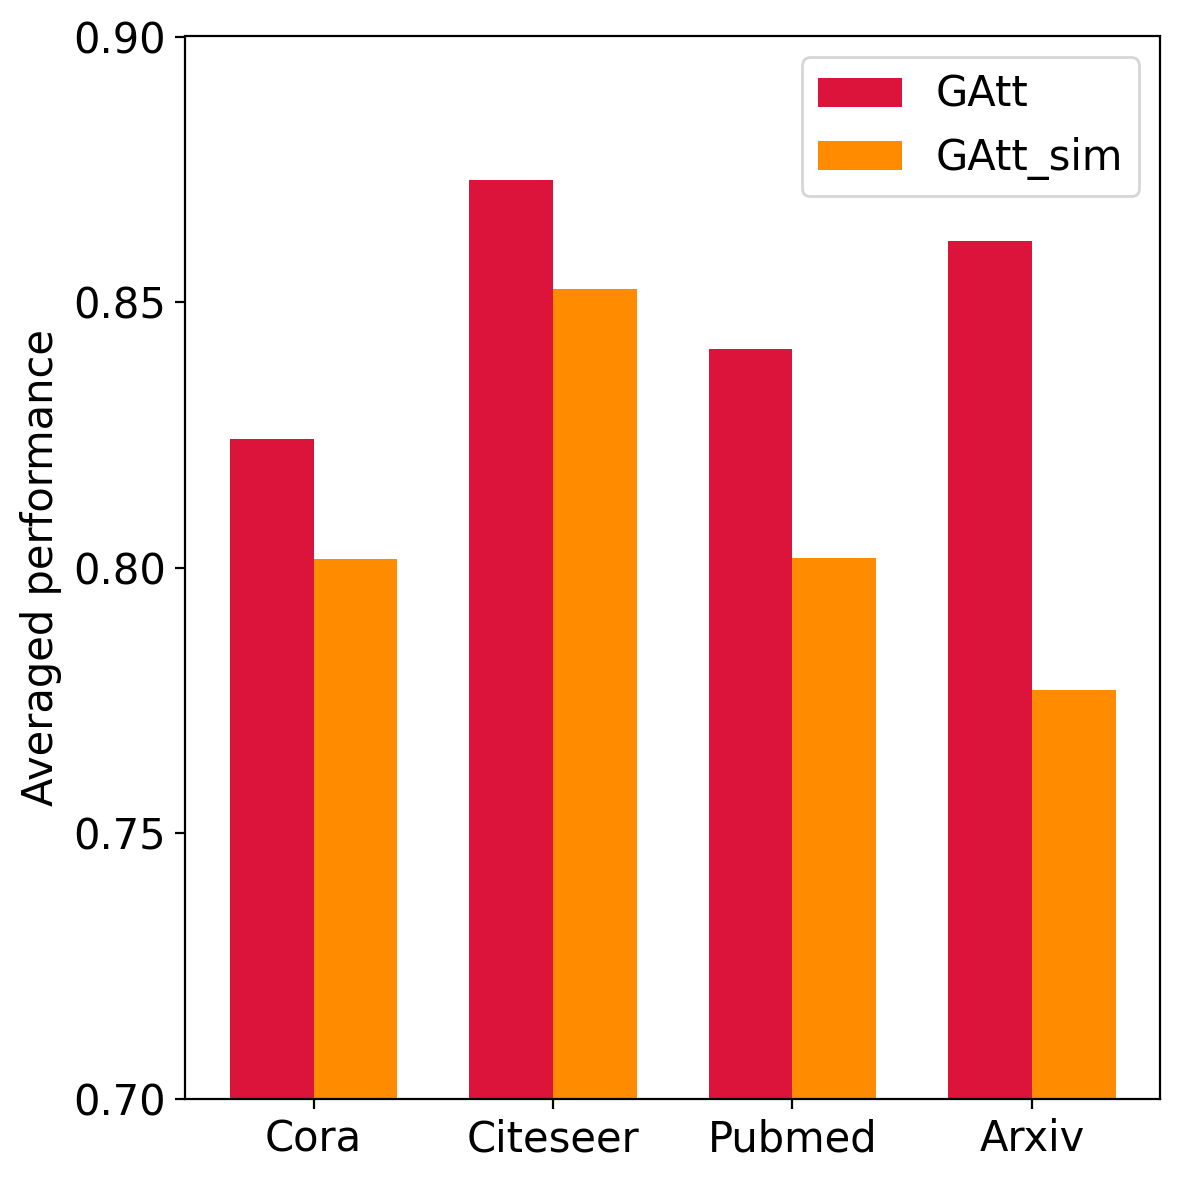

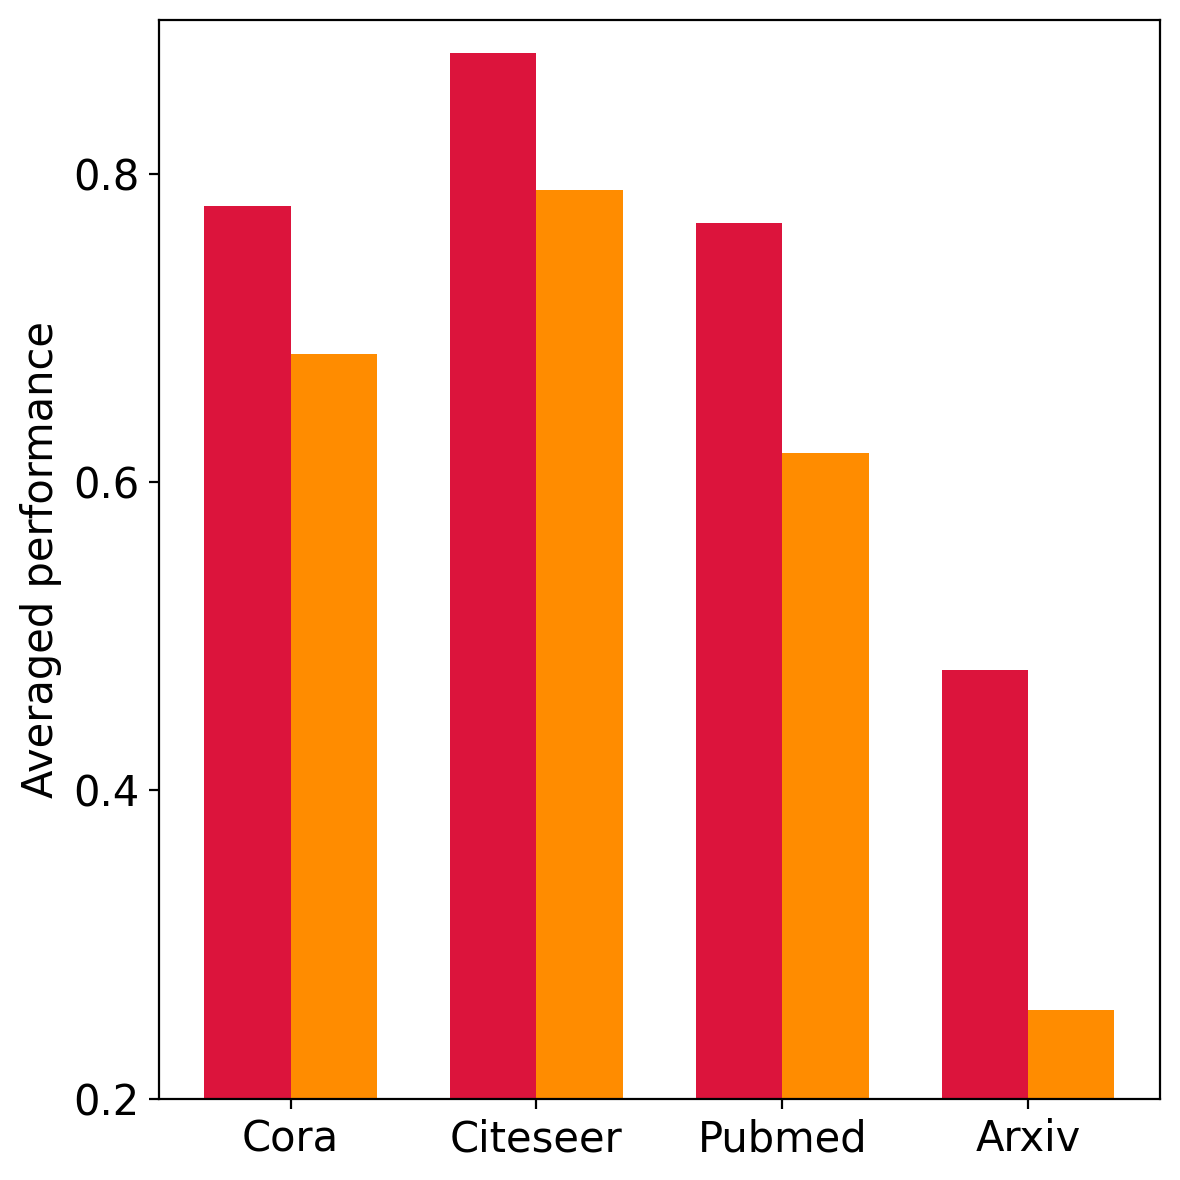

In [22]:
# plot as bar chart
import matplotlib.pyplot as plt

# attattribuet = GAtt, attattribute_sim = GAtt_sim, avgatt = AvgAtt, random = Random
# Only plot 2-layer results
labels = ['Cora', 'Citeseer', 'Pubmed', 'Arxiv']
gatt = [cora_result_2layer[0], citeseer_result_2layer[0], pubmed_result_2layer[0], arxiv_result_2layer[0]]
gatt_sim = [cora_result_2layer[1], citeseer_result_2layer[1], pubmed_result_2layer[1], arxiv_result_2layer[1]]
# Make a horizontal bar chart, plot without avgatt and random and without overlapping
plt.figure(figsize=(6, 6), dpi=200)

x = np.arange(len(labels))
width = 0.35

plt.bar(x - 0.5*width, gatt, width, label='GAtt', color='#dc143c')
plt.bar(x + 0.5*width, gatt_sim, width, label='GAtt_sim', color='#ff8c00')
# plt.barh(y + width, avgatt, width, label='AvgAtt', color='tab:green')
# plt.barh(y + 2 * width, random, width, label='Random', color='tab:red')

plt.xticks(x, labels, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Averaged performance', fontsize=15)
plt.ylim((0.7, 0.9))
plt.legend(loc='upper right', fontsize=15)
plt.locator_params(axis='y', nbins=6)
plt.tight_layout()

plt.show()

# Only plot 3-layer results
labels = ['Cora', 'Citeseer', 'Pubmed', 'Arxiv']
gatt = [cora_result_3layer[0], citeseer_result_3layer[0], pubmed_result_3layer[0], arxiv_result_3layer[0]]
gatt_sim = [cora_result_3layer[1], citeseer_result_3layer[1], pubmed_result_3layer[1], arxiv_result_3layer[1]]
# Make a horizontal bar chart, plot without avgatt and random and without overlapping
plt.figure(figsize=(6, 6), dpi=200)

x = np.arange(len(labels))
width = 0.35

plt.bar(x - 0.5*width, gatt, width, label='GAtt', color='#dc143c')
plt.bar(x + 0.5*width, gatt_sim, width, label='GAtt_sim', color='#ff8c00')
# plt.barh(y + width, avgatt, width, label='AvgAtt', color='tab:green')
# plt.barh(y + 2 * width, random, width, label='Random', color='tab:red')

plt.xticks(x, labels, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Averaged performance', fontsize=15)
plt.ylim((0.2, 0.9))
# plt.legend(loc='upper left', fontsize=15)
plt.locator_params(axis='y', nbins=6)
plt.tight_layout()

plt.show()

## Results for multi-head experiment

### Cora

In [14]:
dataset_name = 'Cora'
configs_2layer =['2L1H', '2L2H', '2L4H', '2L8H']
configs_3layer =['3L1H', '3L2H', '3L4H', '3L8H']

print("------------------------- 2 layer -------------------------")

for config in configs_2layer:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset_name}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset_name}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

print("------------------------- 3 layer -------------------------")

for config in configs_3layer:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset_name}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset_name}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

------------------------- 2 layer -------------------------
|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Cora   |    ΔPC    | pearsonr   | 0.8771 | 0.7979 | 0.1822 | -0.0036|
|   Cora   |    ΔPC    | kendalltau | 0.7432 | 0.7315 | -0.1606 | 0.0130|
|   Cora   |    ΔPC    | spearmanr  | 0.7892 | 0.7844 | -0.2258 | 0.0172|
|   Cora   |    ΔNE    | pearsonr   | 0.7600 | 0.7016 | 0.1608 | -0.0042|
|   Cora   |    ΔNE    | kendalltau | 0.7936 | 0.7832 | -0.1825 | 0.0096|
|   Cora   |    ΔNE    | spearmanr  | 0.8438 | 0.8412 | -0.2545 | 0.0127|
|   Cora   |Pred.change| ROC_AUC    | 0.9628 | 0.9710 | 0.7292 | 0.4915|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Cora   |    ΔPC    | pearsonr   | 0.8490 | 0.7738 | 0.1767 | 0.0174|
|   Cora   |    ΔPC    | kendalltau | 0.7448 | 0.7357 | -0.1699 | 0.0055|
|   Cora   |    ΔPC    | spearmanr  | 0.7896 | 0.7867 | -0.2396 | 0.0073|
|   Cora   |

In [15]:
dataset_name = 'Citeseer'
configs_2layer =['2L1H', '2L2H', '2L4H', '2L8H']
configs_3layer =['3L1H', '3L2H', '3L4H', '3L8H']

print("------------------------- 2 layer -------------------------")

for config in configs_2layer:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset_name}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset_name}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

print("------------------------- 3 layer -------------------------")

for config in configs_3layer:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset_name}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset_name}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

------------------------- 2 layer -------------------------
|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Citeseer   |    ΔPC    | pearsonr   | 0.8459 | 0.8063 | 0.3091 | -0.0118|
|   Citeseer   |    ΔPC    | kendalltau | 0.8067 | 0.7724 | -0.0060 | -0.0274|
|   Citeseer   |    ΔPC    | spearmanr  | 0.8706 | 0.8593 | -0.0140 | -0.0371|
|   Citeseer   |    ΔNE    | pearsonr   | 0.7555 | 0.7394 | 0.2781 | -0.0111|
|   Citeseer   |    ΔNE    | kendalltau | 0.8949 | 0.8665 | -0.0491 | -0.0215|
|   Citeseer   |    ΔNE    | spearmanr  | 0.9579 | 0.9479 | -0.0767 | -0.0293|
|   Citeseer   |Pred.change| ROC_AUC    | 0.9787 | 0.9757 | 0.9175 | 0.4418|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Citeseer   |    ΔPC    | pearsonr   | 0.8343 | 0.7928 | 0.3022 | 0.0030|
|   Citeseer   |    ΔPC    | kendalltau | 0.8013 | 0.7682 | -0.0157 | 0.0169|
|   Citeseer   |    ΔPC    | spearmanr  | 0.86

In [16]:
dataset_name = 'Pubmed'
configs_2layer =['2L1H', '2L2H', '2L4H', '2L8H']
configs_3layer =['3L1H', '3L2H', '3L4H', '3L8H']

print("------------------------- 2 layer -------------------------")

for config in configs_2layer:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset_name}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset_name}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

print("------------------------- 3 layer -------------------------")

for config in configs_3layer:
    results = torch.load(experiment_result_folder + f"Faithfulness_GAT_{dataset_name}_{config}.pt")
    print(f"|     {config}     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |")
    for measure in ["ΔPC", "ΔNE"]:
        if measure == "ΔPC":
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {results['attattribute'][measure][metric]:.4f} | {results['attattribute_sim'][measure][metric]:.4f} | {results['avgatt'][measure][metric]:.4f} | {results['random'][measure][metric]:.4f}|")
        else:
            for metric in ["pearsonr", "kendalltau", "spearmanr"]:
                print(f"|   {dataset_name}   |    {measure}    | {metric:10s} | {-results['attattribute'][measure][metric]:.4f} | {-results['attattribute_sim'][measure][metric]:.4f} | {-results['avgatt'][measure][metric]:.4f} | {-results['random'][measure][metric]:.4f}|")
    print(f"|   {dataset_name}   |Pred.change| ROC_AUC    | {results['attattribute']['ROC_AUC']:.4f} | {results['attattribute_sim']['ROC_AUC']:.4f} | {results['avgatt']['ROC_AUC']:.4f} | {results['random']['ROC_AUC']:.4f}|")
    print("\n")

------------------------- 2 layer -------------------------
|     2L1H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Pubmed   |    ΔPC    | pearsonr   | 0.8683 | 0.7541 | 0.1609 | -0.0004|
|   Pubmed   |    ΔPC    | kendalltau | 0.7531 | 0.7204 | -0.0876 | 0.0003|
|   Pubmed   |    ΔPC    | spearmanr  | 0.7829 | 0.7811 | -0.1164 | 0.0004|
|   Pubmed   |    ΔNE    | pearsonr   | 0.8196 | 0.7209 | 0.1468 | -0.0009|
|   Pubmed   |    ΔNE    | kendalltau | 0.8133 | 0.7854 | -0.0930 | 0.0008|
|   Pubmed   |    ΔNE    | spearmanr  | 0.8522 | 0.8529 | -0.1238 | 0.0010|
|   Pubmed   |Pred.change| ROC_AUC    | 0.9982 | 0.9972 | 0.9620 | 0.5242|


|     2L2H     |  Measure  |   Metric   | attattribute | attattribute_sim | avgatt | random |
|   Pubmed   |    ΔPC    | pearsonr   | 0.8530 | 0.7392 | 0.1592 | -0.0011|
|   Pubmed   |    ΔPC    | kendalltau | 0.7546 | 0.7184 | -0.0962 | -0.0005|
|   Pubmed   |    ΔPC    | spearmanr  | 0.7847 | 0.7777 | -0.1275 